In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.precision', 3)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 25)

In [24]:
excel_file_path = '../data/Per_Cell_MitoSox_Mean_Fluro_Results.xlsx'
results_data = pd.read_excel(excel_file_path)
results_data.head()

,,Label,Area,Mean,IntDen,RawIntDen
0,1,Con_Mito_6.tiff:0,1.222e-04,39.000,5.000e-03,429
1,2,Con_Mito_6.tiff:1,2.222e-05,30.000,6.667e-04,60
2,3,Con_Mito_6.tiff:2,9.000e-02,56.402,5.080e+00,457192
3,4,Con_Mito_6.tiff:3,4.444e-05,53.750,2.000e-03,215
4,5,Con_Mito_6.tiff:4,1.200e-02,41.963,4.900e-01,44061


In [25]:
# dropping null value columns to avoid errors
results_data.dropna(inplace = True)
results_data.shape

(114189, 6)

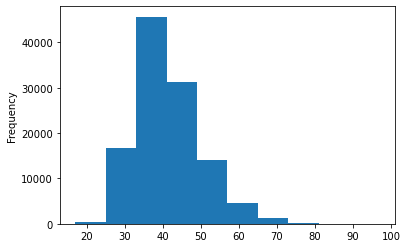

In [26]:
results_sorted = results_data.sort_values(['Label'], ascending=False)
# results_sorted['Count'].head(10).plot(kind='barh')
results_sorted['Mean'].plot(kind='hist')
plt.show()

In [27]:
results_data.describe()


,,Area,Mean,IntDen,RawIntDen
count,114189.000,1.142e+05,114189.000,1.142e+05,1.142e+05
mean,57095.000,4.402e-03,41.145,2.380e-01,2.142e+04
std,32963.669,1.560e-01,8.573,8.528e+00,7.676e+05
min,1.000,1.111e-05,17.000,1.889e-04,1.700e+01
25%,28548.000,1.111e-05,35.000,5.222e-04,4.700e+01
50%,57095.000,4.444e-05,39.933,2.000e-03,1.770e+02
75%,85642.000,3.556e-04,46.000,1.400e-02,1.269e+03
max,114189.000,4.044e+01,97.000,2.157e+03,1.942e+08


In [28]:
split_label = results_data['Label'].str.split(":", expand=True)
split_label.columns = ['id', 'ordinal']
split_label['id'] = split_label['id'].str.replace('C1-','').str.replace('C2-','').str.replace('.tiff','').str.replace('.tif','').str.replace('_Mito', '')
split_label.head()

,id,ordinal
0,Con_6,0
1,Con_6,1
2,Con_6,2
3,Con_6,3
4,Con_6,4


In [29]:
condition_label = split_label['id'].str.split("_", expand=True)
condition_label.columns = ['condition', 'replicate']
condition_label.head()

,condition,replicate
0,Con,6
1,Con,6
2,Con,6
3,Con,6
4,Con,6


In [30]:
results_data['id'] = split_label['id']
results_data['ordinal'] = split_label['ordinal']
results_data.head()

,,Label,Area,Mean,IntDen,RawIntDen,id,ordinal
0,1,Con_Mito_6.tiff:0,1.222e-04,39.000,5.000e-03,429,Con_6,0
1,2,Con_Mito_6.tiff:1,2.222e-05,30.000,6.667e-04,60,Con_6,1
2,3,Con_Mito_6.tiff:2,9.000e-02,56.402,5.080e+00,457192,Con_6,2
3,4,Con_Mito_6.tiff:3,4.444e-05,53.750,2.000e-03,215,Con_6,3
4,5,Con_Mito_6.tiff:4,1.200e-02,41.963,4.900e-01,44061,Con_6,4


In [31]:
results_data['condition'] = condition_label['condition']
results_data['replicate'] = condition_label['replicate']
results_data.head()

,,Label,Area,Mean,IntDen,RawIntDen,id,ordinal,condition,replicate
0,1,Con_Mito_6.tiff:0,1.222e-04,39.000,5.000e-03,429,Con_6,0,Con,6
1,2,Con_Mito_6.tiff:1,2.222e-05,30.000,6.667e-04,60,Con_6,1,Con,6
2,3,Con_Mito_6.tiff:2,9.000e-02,56.402,5.080e+00,457192,Con_6,2,Con,6
3,4,Con_Mito_6.tiff:3,4.444e-05,53.750,2.000e-03,215,Con_6,3,Con,6
4,5,Con_Mito_6.tiff:4,1.200e-02,41.963,4.900e-01,44061,Con_6,4,Con,6


In [32]:
new_column_order = ['id', 'ordinal', 'Mean', 'Label', 'condition', 'replicate']
results_data = results_data[new_column_order]
results_data.rename(columns={'Count': 'nuclei_count', 'Label': 'description'}, inplace=True)
results_data

,id,ordinal,Mean,description,condition,replicate
0,Con_6,0,39.000,Con_Mito_6.tiff:0,Con,6
1,Con_6,1,30.000,Con_Mito_6.tiff:1,Con,6
2,Con_6,2,56.402,Con_Mito_6.tiff:2,Con,6
3,Con_6,3,53.750,Con_Mito_6.tiff:3,Con,6
4,Con_6,4,41.963,Con_Mito_6.tiff:4,Con,6
...,...,...,...,...,...,...
114184,Positive con_3,6322,36.200,Positive con_Mito_3.tiff:6322,Positive con,3
114185,Positive con_3,6323,42.067,Positive con_Mito_3.tiff:6323,Positive con,3
114186,Positive con_3,6324,36.500,Positive con_Mito_3.tiff:6324,Positive con,3
114187,Positive con_3,6325,38.000,Positive con_Mito_3.tiff:6325,Positive con,3


In [33]:
results_data.groupby('id')['Mean'].sum()

id
Con_1             149425.830
Con_2             186217.022
Con_3             175710.845
Con_4             145311.987
Con_5             155651.473
Con_6             161747.287
Positive con_1    280203.338
Positive con_2    196480.835
Positive con_3    276452.696
Positive con_4    197210.000
Positive con_5    198843.542
Positive con_6    192896.090
TGFb2_1           225119.125
TGFb2_2           232320.459
TGFb2_3           192045.641
TGFb2_4           223332.873
TGFb2_5           230935.403
TGFb2_6           193845.299
TNFa_1             84905.269
TNFa_2            236068.520
TNFa_3            218465.037
TNFa_4            123106.978
TNFa_5            238092.490
TNFa_6            183920.402
Name: Mean, dtype: float64

In [34]:
results_fluoro_id_means = results_data.groupby('id')['Mean'].mean()
results_fluoro_id_means

id
Con_1             34.986
Con_2             36.780
Con_3             34.780
Con_4             34.897
Con_5             34.884
Con_6             39.654
Positive con_1    42.098
Positive con_2    52.283
Positive con_3    43.694
Positive con_4    52.942
Positive con_5    51.688
Positive con_6    50.483
TGFb2_1           41.028
TGFb2_2           40.530
TGFb2_3           38.067
TGFb2_4           40.139
TGFb2_5           41.670
TGFb2_6           40.250
TNFa_1            39.564
TNFa_2            41.292
TNFa_3            41.700
TNFa_4            38.664
TNFa_5            42.058
TNFa_6            38.071
Name: Mean, dtype: float64

In [35]:
result_fluoro_condition_means = results_data.groupby('condition')['Mean'].mean()
result_fluoro_condition_means

condition
Con             35.955
Positive con    47.703
TGFb2           40.316
TNFa            40.502
Name: Mean, dtype: float64

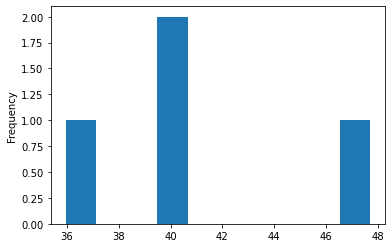

In [36]:
results_data.groupby('condition')['Mean'].mean().plot(kind='hist')
plt.show()

In [37]:
results_data.groupby('condition')['Mean'].mean()[1]


47.703366069524606

In [38]:
from openpyxl import load_workbook

book = load_workbook(excel_file_path)
excel_writer = pd.ExcelWriter(excel_file_path, engine='openpyxl')
excel_writer.book = book

results_data.to_excel(excel_writer, sheet_name= 'Data_Results')
results_fluoro_id_means.to_excel(excel_writer, sheet_name= 'Fluoro_Id_Means')
result_fluoro_condition_means.to_excel(excel_writer, sheet_name= 'Fluoro_Condition_Means')
excel_writer.save()
excel_writer.close()